# Process Census Data

Load the raw Australian Beureau of Statistics (ABS) Census data and process it into a format that can be used for analysis. 

We use the 'SA1' geography, which is similar to LSOA in the UK.

In [29]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

boundary_dir = os.path.join("..", "..", "Data", "Boundary_Data")
census_dir = os.path.join("..", "..", "Data", "Census_Data")


## Read boundary data 

Read the following SA1 shapefiles:

  - 2011: [SA1_2011_AUST.shp](https://data.gov.au/data/dataset/asgs-2011-edition-boundaries) (_note that the raw data is a large geopackage file, from which I extracted the SA1 shapefile; see below_)
  - 2016: [SA1_2016_AUST.gpkg](https://data.gov.au/data/dataset/asgs-2016-edition-boundaries) (_ditto_)
  - 2021: [SA1_2021_AUST_GDA2020.shp](https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files)
 

### 2021

Just open the shapefile and select inner melbourne

In [2]:
sa1_2021 = gpd.read_file(os.path.join(boundary_dir, "SA1_2021_AUST_GDA2020.shp"))
sa1_2021 = sa1_2021.loc[sa1_2021.SA4_NAME21 == "Melbourne - Inner",:]  # Select inner belbourne

### 2016

The raw geopackage is massive and contains loads of different layers. The code below will read the `statistical_area_level_1_2016` layer and save that file. Then the code after that just reads the Melbourne data we need and I haven't saved the whole geopackage permanently.

In [3]:
sa1_2016 = gpd.read_file(os.path.join(boundary_dir, "SA1_2016_AUST.gpkg"))
#sa1_2016.plot()

### 2011

The raw geopackage is massive and contains loads of different layers. The code below will read the `statistical_area_level_1_2011` layer and save that file. Then the code after that just reads the Melbourne data we need and I haven't saved the whole geopackage permanently.

In [21]:
sa1_2011 = gpd.read_file(os.path.join(boundary_dir, "SA1_2011_AUST.gpkg"))
sa1_2011['SA1_7DIGITCODE_2011'] = pd.to_numeric(sa1_2011['SA1_7DIGITCODE_2011'])
#sa1_2011.plot()

### Check three maps

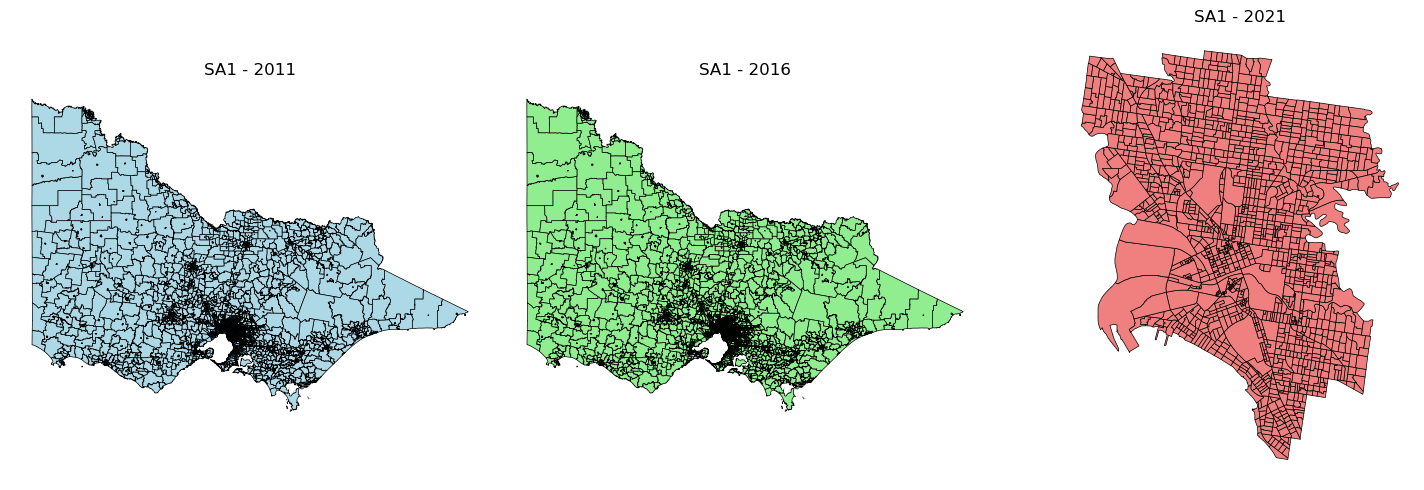

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each map
sa1_2011.plot(ax=axes[0], color="lightblue", edgecolor="black", linewidth=0.5 )
axes[0].set_title("SA1 - 2011")

sa1_2016.plot(ax=axes[1], color="lightgreen", edgecolor="black", linewidth=0.5 )
axes[1].set_title("SA1 - 2016")

sa1_2021.plot(ax=axes[2], color="lightcoral", edgecolor="black", linewidth=0.5 )
axes[2].set_title("SA1 - 2021")

# Remove axes for a cleaner look
for ax in axes:
    ax.set_axis_off()

plt.tight_layout()
plt.show()

## Read Census data
Read the following files, all downloaded using the [ABS TableBuilder](https://tablebuilder.abs.gov.au/webapi/jsf/tableView/tableView.xhtml). Note that for most files I needed to delete unnecessary rows in the csv file.

  - **Age**
    - `2011-InnerMel-Age.csv`: 2011 SA1 by Greater Capital City Statistical Areas (UR) by Age in Single Years (AGEP)




In [31]:
# Read the age data
age_2011 = pd.read_csv(os.path.join(census_dir, "2011-InnerMel-Age.csv"))
age_2011["SA1_Code"] = pd.to_numeric(age_2011["SA1_Code"])
del age_2011["Total"]
del age_2011['Unnamed: 103']

# Calculate the mean age. Ignore the first colum (the code)
ages = np.arange(len(age_2011.columns) - 1)  # Array of ages starting from 0
population_counts = age_2011.iloc[:, 1:]    # Select only age columns

# Calculate mean age for each row
age_2011['mean_age'] = (population_counts * ages).sum(axis=1) / population_counts.sum(axis=1)
age_2011

,SA1_Code,0 years,1 year,2 years,3 years,4 years,5 years,6 years,7 years,8 years,...,92 years,93 years,94 years,95 years,96 years,97 years,98 years,99 years,100 years and over,mean_age
0,2110501,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.364532
1,2110502,8,3,11,8,4,3,7,4,4,...,0,0,0,0,0,0,0,0,0,38.194222
2,2110503,8,0,7,3,0,5,3,3,0,...,0,0,0,0,0,0,0,0,3,39.627273
3,2110504,7,3,0,3,3,3,0,3,0,...,0,0,0,0,0,0,0,0,0,35.452703
4,2110505,5,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38.629371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,2114517,11,7,0,8,3,3,10,0,7,...,0,0,0,0,0,0,0,0,0,35.122137
1190,2114518,5,6,8,0,11,3,0,4,0,...,0,0,0,0,0,0,0,0,0,36.309309
1191,2114519,6,6,5,6,0,3,8,3,0,...,0,0,0,0,0,0,0,0,0,36.937500
1192,2114520,0,0,0,0,6,0,0,3,0,...,0,0,0,0,0,0,0,0,0,34.811728


<Axes: >

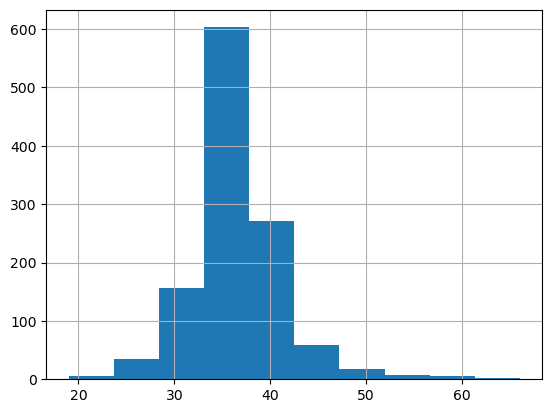

In [34]:
age_2011["mean_age"].hist()

In [14]:
sa1_2011.columns

Index(['SA1_MAINCODE_2011', 'SA1_7DIGITCODE_2011', 'STE_CODE_2011',
       'STE_NAME_2011', 'geometry'],
      dtype='object')

In [11]:
age_2011

,SA1_Code,0 years,1 year,2 years,3 years,4 years,5 years,6 years,7 years,8 years,...,91 years,92 years,93 years,94 years,95 years,96 years,97 years,98 years,99 years,100 years and over
0,2110501,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2110502,8,3,11,8,4,3,7,4,4,...,0,0,0,0,0,0,0,0,0,0
2,2110503,8,0,7,3,0,5,3,3,0,...,0,0,0,0,0,0,0,0,0,3
3,2110504,7,3,0,3,3,3,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4,2110505,5,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,2114517,11,7,0,8,3,3,10,0,7,...,0,0,0,0,0,0,0,0,0,0
1190,2114518,5,6,8,0,11,3,0,4,0,...,0,0,0,0,0,0,0,0,0,0
1191,2114519,6,6,5,6,0,3,8,3,0,...,0,0,0,0,0,0,0,0,0,0
1192,2114520,0,0,0,0,6,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0


## Join the boundary and census data

<Axes: >

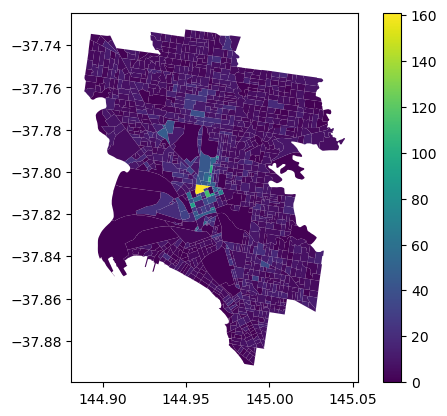

### 2021

### 2016

### 2011

<Axes: >

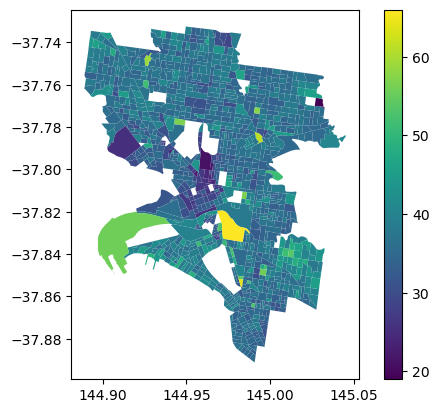

In [32]:
# TEST 
join_2011 = sa1_2011.merge(age_2011, left_on="SA1_7DIGITCODE_2011", right_on="SA1_Code", how="inner")
join_2011.plot(column="mean_age", legend=True)
